# Projet 1 - MATH2307P
Nom : Edward, Brenton, Simon

## Résumé

L'algèbre linéaire est une discipline très importante qui prut être utilisée dans de nombreux domaines différents. Dans ce projet on va étudier son utilisation **geométrique**. Comme les situations qu'on étudie sont dans $\mathbb{R}^3$, donc pour mieux répondre les questions et simplifier les codes suivants, on définie les points (3 équations), les droites (2 équations) et les points (1 équation) au début en utilisant Python.

Ensuite pour les opérations a et b, on utilise le **Faisceau d'hyperplan** pour contruire un plan quelconque et calculer les coefficients de la combinaison linéaire. On en déduit le plan qu'on veut. Après la calcule, on utilise **matplotlib** pour illustrer étape par étape.

Pour trouver la ligne perpendiculaire commune, on détermine 2 plans qui contient la ligne en utilisant la même idée. Mais dans cette partie, il doit montrer l'existence de la ligne perpendiculaire commune, donc on ajoute quelques codes pour justifier si c'est existentiel. Ensuite on aussi explique étape par étape en utilisant matplotlib. 

Enfin, en utilisant la fonction qu'on a défini avant, on peut trouver les solutions de la question 4 et les codes correspondants sont relativement simples.

**Mots-clés : Geométrique , Faisceau d'hyperplan , matplotlib**

Nous avons d'abord inclus toutes les bibliothèques Python nécessaires pour ce projet.

In [2]:
import numpy as np
import sympy as sp
from sympy import symbols, Symbol
a1, a2, a3 = symbols("a1 a2 a3")
b1, b2, b3 = symbols("b1 b2 b3")
c1, c2, c3 = symbols("c1 c2 c3")
d1, d2, d3 = symbols("d1 d2 d3")
m, n, p, q = symbols("m n p q")
x, y, z = symbols("x y z")
lamda, mu, gamma = symbols("lambda mu gamma")

import matplotlib.pyplot as plt

## Constructions Basiques
> On va constuire les points, droites et plans dans cette partie. Chaque object est représenté de 1, 2 ou 3 équation(s).

- Dans notre projet, toutes les équations ont été exprimées sous cette forme : $$ax+by+cz=d \iff ax+by+cz-d=0$$
- On définit les points, droites, plans comme :
    - `point = Point(); droite = Droite(); plan = Plan()` - Sans input, il va fonctionner avec les paramètres inconnues.
    - `point = Point((2, 1, 3, 1), (3, 1, 2, 1), (1, 2, 4, 2))` - 3 paranthèse avec 4 variables dans chaque paranthèse
    - `droite = Droite((2, 1, 1), (2, 3, 1))`
    - `plan = Plan((1, 2, 1))`

- Examiner l'équation dans laquelle une variable spécifique est soumise à des contraintes : `OBJECT.info()`

- Les paramètres :
    - Équation de l'object : `OBJECT.eqs`
    - Les paramètres de chaque object : `OBJECT.params`.

- Notre code inclut une vérification de la validité des entrées numériques pures, notez que nous ne faisons cela que pour les entrées numériques pures.

In [3]:
class Point():
    def __init__(self, eq1_param=(a1, b1, c1, d1),
                       eq2_param=(a2, b2, c2, d2),
                       eq3_param=(a3, b3, c3, d3),
                       variable=[x, y, z]):
        
        self.eqs = [
            eq1_param[0]*x + eq1_param[1]*y + eq1_param[2]*z - eq1_param[3],
            eq2_param[0]*x + eq2_param[1]*y + eq2_param[2]*z - eq2_param[3],
            eq3_param[0]*x + eq3_param[1]*y + eq3_param[2]*z - eq3_param[3]
        ]
        
        self.params = [eq1_param, eq2_param, eq3_param]
        self.eqparam = [(eq1_param[0],eq1_param[1],eq1_param[2]),
                        (eq2_param[0],eq2_param[1],eq2_param[2]),
                        (eq3_param[0],eq2_param[1],eq3_param[2])] 
        
        if sp.Matrix(self.eqparam).det()==0:
            raise ValueError("Vous devriez vérifier votre saisie.")
    
    def info(self):
        print("Les équations de ce point :")
        for index, eq in enumerate(self.eqs):
            display(eq)
    
### ----------------------UTILISATION--------------------- ###
point_exemple1 = Point()
point_exemple1.info()

point_exemple2 = Point((2, 3, 1, 1), (2, 3, 2, 1), (3, 1, 2, 2))
point_exemple2.info()

try:
    point_exemple3 = Point((2, 3, 1, 1), (2, 3, 1, 2), (2, 3, 1, 3))
except:
    print("Point_Exemple3 ne fonctionne pas.")

Les équations de ce point :


a1*x + b1*y + c1*z - d1

a2*x + b2*y + c2*z - d2

a3*x + b3*y + c3*z - d3

Les équations de ce point :


2*x + 3*y + z - 1

2*x + 3*y + 2*z - 1

3*x + y + 2*z - 2

Point_Exemple3 ne fonctionne pas.


In [4]:
class Droite():
    def __init__(self, eq1_param=(a1, b1, c1, d1),
                       eq2_param=(a2, b2, c2, d2),
                       variable=[x, y, z]):
        
        if (type(eq1_param[0]) == float or type(eq1_param[0]) == int):
            if (type(eq2_param[0]) == float or type(eq2_param[0]) == int):
                assert not ((eq2_param[0]/eq1_param[0] == eq2_param[1]/eq1_param[1] == eq2_param[2]/eq1_param[2]))
                
        self.eqs = [
            eq1_param[0]*x + eq1_param[1]*y + eq1_param[2]*z - eq1_param[3],
            eq2_param[0]*x + eq2_param[1]*y + eq2_param[2]*z - eq2_param[3],
        ]
        
        self.params = [eq1_param, eq2_param]
        self.eqparam = [(eq1_param[0],eq1_param[1],eq1_param[2]),
                        (eq2_param[0],eq2_param[1],eq2_param[2]),] 

    def info(self):
        print("Les équations de ce droite :")
        for index, eq in enumerate(self.eqs):
            display(eq)
        

### ----------------------UTILISATION--------------------- ###
M, N, P = sp.symbols("M N P") 
droite_exemple = Droite((2, 1, 3, 1), (M, N, P, 1))
droite_exemple.info()

Les équations de ce droite :


2*x + y + 3*z - 1

M*x + N*y + P*z - 1

In [5]:
class Plan():
    def __init__(self, eq_param=(m, n, p, q)):
        self.eqs = [
            eq_param[0]*x + eq_param[1]*y + eq_param[2]*z - eq_param[3]
        ]
        
        self.params = [eq_param]
    
    def info(self):
        print("L'équation de ce plan :")
        for index, eq in enumerate(self.eqs):
            display(eq)
        

### ----------------------UTILISATION--------------------- ###
e = sp.Symbol("e")
plan_exemple = Plan((e,e,e,e)); plan_exemple.info()

L'équation de ce plan :


e*x + e*y + e*z - e

Trouver une équation supplémentaire du point (choisit aléatoirement) sur le droite.

In [6]:
class Point_de_droite():
    def __init__(self, m,
                       droite=Droite(),
                       variable=[x, y, z]):
        
        eq3_param_0 = [(1, 0, 0),(0, 1, 0),(0, 0, 1)]
        eq3_param_1 = [(1, 0, 0, m),(0, 1, 0, m),(0, 0, 1, m)]
        
        for i in range(3):
            if sp.Matrix([eq3_param_0[i],droite.eqparam[0],droite.eqparam[1]]).det()!=0:
                eq3_param=eq3_param_1[i]
                break
        
        self.eqs = [
            droite.params[0][0]*x + droite.params[0][1]*y + droite.params[0][2]*z - droite.params[0][3],
            droite.params[1][0]*x + droite.params[1][1]*y + droite.params[1][2]*z - droite.params[1][3],
            eq3_param[0]*x + eq3_param[1]*y + eq3_param[2]*z - eq3_param[3]
        ]

        self.params = [droite.params[0],droite.params[1], eq3_param]

    def info(self):
        print("Les équations de ce point :")
        for eq in self.eqs:
            display(eq)

droite_ici = Droite((2, 1, 3, 1), (1, 1, 3, 1))
point = Point_de_droite(m,droite_ici)
point.params

[(2, 1, 3, 1), (1, 1, 3, 1), (0, 1, 0, m)]

## Opération (a): Parallèlement

> Dans cette partie, on va construire un plan (1 équation) passant par un point (3 équations) et parallèle à un plan donné (1 équation).

- Notations:
    - Le plan donné : $$mx+ny+pz=q \quad(\mathscr{P}_d)$$
    - Le point donné par : $$\begin{cases}a_1x+b_1y+c_1z=d_1 \quad(\mathscr{H}_1)\\a_2x+b_2y+c_2z=d_2\quad(\mathscr{H}_2)\\a_3x+b_3y+c_3y=d_3\quad(\mathscr{H}_3)\end{cases}$$Cela implique une point notant $\bar{x}\in \mathbb R^3$ suffit à la fois ces trois équations est : $$\bar{x} \in \mathscr{H}_1\cap \mathscr{H}_2 \cap\mathscr{H}_3$$
    - Les trois hyperplans correspondants : $$\begin{cases}\mathscr{H}_1 = \text{Ker }(\varphi_1),\quad \varphi_1:(x,y,z)\mapsto a_1x+b_1y+c_1z-d_1\\ \mathscr{H}_2 = \text{Ker }(\varphi_2),\quad \varphi_2:(x,y,z) \mapsto a_2x+b_2y+c_2z-d_2\\ \mathscr{H}_3 = \text{Ker }(\varphi_3),\quad \varphi_3:(x,y,z)\mapsto a_3x+b_3y+c_3z-d_3\end{cases}$$
    
- Le plan que l'on souhaite est parallèle au plan donné, c'est-à-dire, les deux plans sont deux translations distincts d'une même espace vectoriel, la même hyperplan associé à $$\varphi_p:(x,y,z) \mapsto mx+ny+pz$$
- D'après le **Faisceau d'hyperplan**, on sais que si une sous-espace affine $\mathscr{P}=\text{Ker }(p)$ suffit $$\mathscr{P}=\text{Ker }(p) \supset \bigcap_{i=1}^3\mathscr{H}_i = \bigcap_{i=1}^3\text{Ker }\varphi_i$$Alors, $$p = \text{Vect }(\{\varphi_1,\varphi_2, \varphi_3\})$$

- Ça sert à quoi ? Le plan que l'on souhaite contient le point commune de ces hyperplans $\bar{I}$, qui est l'intersection de tous les $(\mathscr{H}_i)$. Donc le plan peut exprimer comme $\mathscr{P}=\text{Ker }(p)$. Cela nous inspire de trouver l'équation étant égale à $0$, la combinaison linéaire de $\{\varphi_1,\varphi_2, \varphi_3\}$.

- En admettant que $(\lambda, \mu, \gamma)\in\mathbb{R}^3\setminus\{(0,0,0)\}$, On exprime le plan comme $$\lambda(a_1x+b_1y+c_1z-d_1)+ \mu(a_2x+b_2y+c_2z-d_2)+\gamma(a_3x+b_3y+c_3z-d_3)=0\quad(\mathscr{P})$$ Est-ce qu tous les coefficients suffisent ? Évidemment non, en fait le point $\bar{I}$ est aussi sur ce plan, il est à la fois suffit : $$mx+ny+pz=q'$$.

- On en déduit que, soit $\bar{I} = (\bar{x}, \bar{y}, \bar{z})$ : $$\begin{cases}(\lambda a_1 +\mu a_2 + \gamma a_3)\bar{x} + (\lambda b_1 + \mu b_2+ \gamma b_3)\bar{y} +(\lambda c_1 + \mu c_2 + \gamma c_3) \bar{z} -\lambda d_1 - \mu d_2 - \gamma d_3&= 0\\ m\bar{x} + n\bar{y} + p\bar{z}-q'&=0\end{cases}$$où $q'$, le coefficient de notre nouvel plan qui est inconnue et à déterminer. Cela permet de trouver les relations entre les trois paramètres, ici $(\lambda, \mu, \gamma)$ est une solution de ces équation.


In [7]:
def parallel(point=Point(), plan=Plan()):
     parametre_lambda_gamma_mu = sp.solve([lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0] - plan.params[0][0], # lambda * a1 + mu * a2 + gamma * a3 = m
                                           lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1] - plan.params[0][1], # lambda * b1 + mu * b2 + gamma * b3 = n
                                        lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2] - plan.params[0][2]], [lamda, mu, gamma]) # lambda * c1 + mu * c2 + gamma * c3 = p
     
     
     point_func = sp.Matrix([[point.params[0][0], point.params[0][1], point.params[0][2], point.params[0][3]], # a1, b1, c1, -d1
                             [point.params[1][0], point.params[1][1], point.params[1][2], point.params[1][3]], # a2, b2, c2, -d2
                             [point.params[2][0], point.params[2][1], point.params[2][2], point.params[2][3]], # a3, b3, c3, -d3
                             ])
     
     coefficients = sp.Matrix([lamda, mu, gamma]).subs(parametre_lambda_gamma_mu).transpose()
     plan_final_coef = coefficients * point_func
     plan_final_coef.simplify()
     plan_final = Plan(plan_final_coef)
     
     return plan_final

Notre exemple :

In [8]:
point_intersection = Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))
plan_reference = Plan((2, 1, 3, 3)) 
plan_final = parallel(point_intersection, plan_reference)
plan_final.info()

L'équation de ce plan :


2*x + y + 3*z - 10/17

### Partie Matplotlib et Vérifications

Étape 1 : Point représenté par 3 équations

- Afin de tracer les points dans Matplotlib, nous devons calculer les coordonnées x, y et z des points. Cette étape n'est utilisée que pour le traçage et la vérification, elle n'est absolument pas nécessaire dans la fonction de résolution du problème !

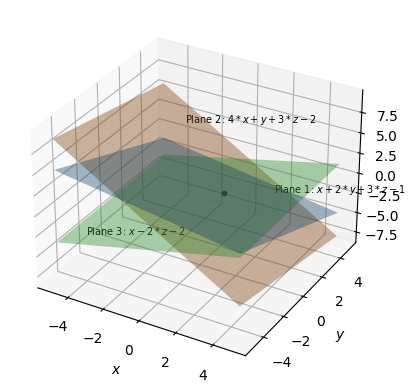

In [9]:
# Planes
ax = plt.axes(projection="3d")
ax.grid(linewidth=0.5, linestyle='-', alpha=0.1)
x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]
label_pos_x = [3, -2, -4]
label_pos_y = [2, 2, -4]
label_pos_z = [0, 5.5, -3]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
### --- Plot les plans --- ###
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                            point_intersection.params[i][0] * X - \
                            point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], alpha=0.4)
    
    ax.text(label_pos_x[i], label_pos_y[i], label_pos_z[i], f'Plane {i+1}: ${point_intersection.eqs[i]}$', fontsize=7)
    
### --- Plot le point --- ###
# Le ligne 20 est SEULEMENT POUR ILLUSTRATION, MAIS PAS DANS LA PARTIE D'DÉMONSTRATION !
point_commun = sp.solve((point_intersection.eqs[0], point_intersection.eqs[1], point_intersection.eqs[2]), (x, y, z))
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", alpha=0.8, s=10)

### --- Autres --- ###
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./a1.pdf")
plt.show()

Étape 2 : Configuration du théorème Faisceau d'hyperplan

- On prend *aléatoirement* les valeurs de $\lambda$, $\mu$ et $\gamma$, comme ce que l'on a expliqué : $$\lambda(a_1x+b_1y+c_1z-d_1)+ \mu(a_2x+b_2y+c_2z-d_2)+\gamma(a_3x+b_3y+c_3z-d_3)=0\quad(\mathscr{P})$$

- En prenant différentes valeurs de paramètres, nous avons découvert que nous avons généré un nouveau plan qui passe par l'intersection des trois plans.

- Vous pouvez exécuter ce programme plusieurs fois, chaque exécution produira un résultat différent.


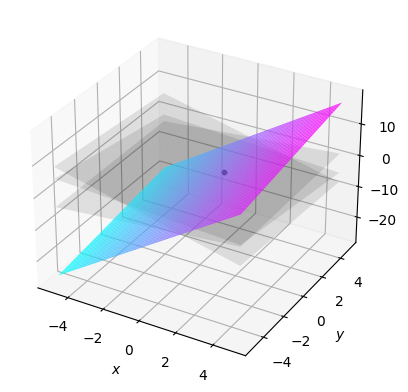

In [10]:
### ---Cette partie, lambda, mu et gamma sont créés aléatoirement !!!--- ###
n_lamda, n_mu, n_gamma = np.random.uniform(-1, 1, 3) # Vous pouvez changer les valeurs ici.

ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                               point_intersection.params[i][0] * X - \
                               point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], color="black", alpha=0.1)
    
# ---Le résultat d'après le théorème d'hyperplan--- #
plan_nouveau_Z = ((n_lamda * point_intersection.params[0][3] + \
                 n_mu * point_intersection.params[1][3] + \
                 n_gamma * point_intersection.params[2][3]) - \
                 (n_lamda * point_intersection.params[0][0] + 
                   n_mu * point_intersection.params[1][0] + 
                   n_gamma * point_intersection.params[2][0]) * X - \
                 (n_lamda * point_intersection.params[0][1] +
                  n_mu * point_intersection.params[1][1] +
                  n_gamma * point_intersection.params[2][1]) * Y) / \
                 (n_lamda * point_intersection.params[0][2] +
                  n_mu * point_intersection.params[1][2] +
                  n_gamma * point_intersection.params[2][2])
                 
ax.plot_surface(X, Y, plan_nouveau_Z, cmap="cool", alpha=0.8)
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=10)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./a2.pdf")
plt.show()

Étape 3 : La seul possibilité de  $\lambda, \mu, \gamma$

- Le résultat du calcul de la seule possibilité de combinaison linéaire est limité par les conditions connues. 
  
- En effectuant des calculs, nous avons déterminé les valeurs des trois paramètres qui permettent à ce nouveau plan de rester parallèle au plan donné dans l'énoncé. Cela nous a permis de déterminer un plan unique et réalisable.

In [11]:
### --- Partie : Les résultats des paramètres --- ###
def parallel_partie(point=Point(), plan=Plan()):
     parametre_lambda_gamma_mu = sp.solve([lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0] - plan.params[0][0], # lambda * a1 + mu * a2 + gamma * a3 = m
                                           lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1] - plan.params[0][1], # lambda * b1 + mu * b2 + gamma * b3 = n
                                        lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2] - plan.params[0][2]], [lamda, mu, gamma]) # lambda * c1 + mu * c2 + gamma * c3 = p
    
     return list(parametre_lambda_gamma_mu.values())

point_intersection = Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))
plan_reference = Plan((2, 1, 3, 3)) 
n_lamda, n_mu, n_gamma = *parallel_partie(point_intersection, plan_reference),
display(n_lamda, n_mu, n_gamma)

4/17

9/17

-6/17

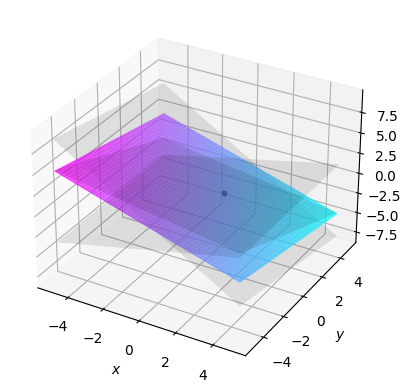

In [12]:
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                               point_intersection.params[i][0] * X - \
                               point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], color="black", alpha=0.1)
    
# ---Le résultat d'après le théorème d'hyperplan--- #
plan_nouveau_Z = ((n_lamda * point_intersection.params[0][3] + \
                 n_mu * point_intersection.params[1][3] + \
                 n_gamma * point_intersection.params[2][3]) - \
                 (n_lamda * point_intersection.params[0][0] + 
                   n_mu * point_intersection.params[1][0] + 
                   n_gamma * point_intersection.params[2][0]) * X - \
                 (n_lamda * point_intersection.params[0][1] +
                  n_mu * point_intersection.params[1][1] +
                  n_gamma * point_intersection.params[2][1]) * Y) / \
                 (n_lamda * point_intersection.params[0][2] +
                  n_mu * point_intersection.params[1][2] +
                  n_gamma * point_intersection.params[2][2])
plan_nouveau_Z=np.array(plan_nouveau_Z, dtype=np.float32)                 
ax.plot_surface(X, Y, plan_nouveau_Z, cmap="cool", alpha=0.8)
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=10)

### --- Autres --- ###
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./a3.pdf")
plt.show()

Étape 4 : Le plan que l'on recherche est à la fois une combinaison linéaire des trois formes linéaires du point et une translation (en parallèle) du plan donné. Après le calcul, il est temps de vérifier !

Explication :
- [IMPORTANT] Le **Plan que l'on souhaite** est représenté en bleu.
- Le plan donné est représenté en jaune.

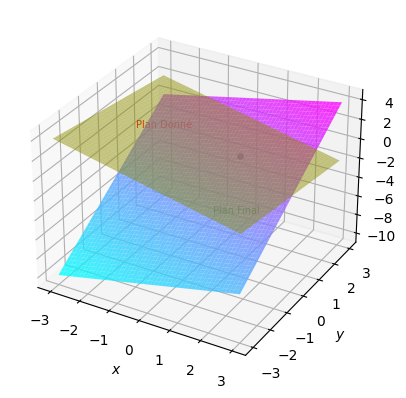

In [92]:
ax = plt.axes(projection="3d")

x_data = np.arange(-3, 3, 0.01)
y_data = np.arange(-3, 3, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]
    
# ---Le résultat d'après le théorème d'hyperplan--- #
plan_nouveau_Z = ((n_lamda * point_intersection.params[0][3] + \
                 n_mu * point_intersection.params[1][3] + \
                 n_gamma * point_intersection.params[2][3]) - \
                 (n_lamda * point_intersection.params[0][0] + 
                   n_mu * point_intersection.params[1][0] + 
                   n_gamma * point_intersection.params[2][0]) * X - \
                 (n_lamda * point_intersection.params[0][1] +
                  n_mu * point_intersection.params[1][1] +
                  n_gamma * point_intersection.params[2][1]) * Y) / \
                 (n_lamda * point_intersection.params[0][2] +
                  n_mu * point_intersection.params[1][2] +
                  n_gamma * point_intersection.params[2][2])
                 

### ---NOUVEAU PARTIE, VÉRIFICATION--- ###

plan_reference_Z = (plan_reference.params[0][3] - plan_reference.params[0][0] * X - plan_reference.params[0][1] * Y) / plan_reference.params[0][2]
ax.plot_surface(X, Y, plan_reference_Z, color="yellow", alpha=0.5)

plan_nouveau_Z = ((n_lamda * point_intersection.params[0][3] + \
                 n_mu * point_intersection.params[1][3] + \
                 n_gamma * point_intersection.params[2][3]) - \
                 (n_lamda * point_intersection.params[0][0] + 
                   n_mu * point_intersection.params[1][0] + 
                   n_gamma * point_intersection.params[2][0]) * X - \
                 (n_lamda * point_intersection.params[0][1] +
                  n_mu * point_intersection.params[1][1] +
                  n_gamma * point_intersection.params[2][1]) * Y) / \
                 (n_lamda * point_intersection.params[0][2] +
                  n_mu * point_intersection.params[1][2] +
                  n_gamma * point_intersection.params[2][2])
                 

plan_final_Z = (plan_final.params[0][3] - 
                plan_final.params[0][0] * X - 
                plan_final.params[0][1] * Y) / plan_final.params[0][2]

plan_nouveau_Z=np.array(plan_nouveau_Z, dtype=np.float32) 
#ax.plot_surface(X, Y, plan_final_Z, cmap="cool", alpha=0.7)
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=15, alpha=0.5)
ax.plot_surface(X, Y, plan_nouveau_Z, cmap="cool", alpha=0.8)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")
# ax.view_init(azim=75, elev=15)

ax.text(1, -1, -3, f'Plan Final', fontsize=7, color="green")

ax.text(-1.5, -1, 3.5, f'Plan Donné', fontsize=7, color="red")
plt.savefig("./a4.pdf")
plt.show()

## Opération (b): Perpendiculaire

> Dans cette partie, on va construire un plan (1 équation) passant par un point (3 équations) et perpendiculaire à une droite donnée (2 équations).

- Lemme : Si on a un plan $mx+ny+pz=q$ , alors on peut représenter son orthogonal comme : $\mathbb{K}.(m,n,p)$
    - Preuve : Soit $(x_1,y_1,z_1)$ , $(x_2,y_2,z_2)$ deux points sur le plan $mx+ny+pz=q$ , donc on a :
    $$\begin{cases}mx_1+ny_1+pz_1=q\\mx_2+ny_2+pz_2=q\end{cases}$$
    On calcule la différence entre ces deux équations et on obtient: $m(x_1-x_2)+n_(y_1-y_2)+p(z_1-z_2)=0$ \
    Donc la vecteur $(m,n,p)$ est bien perpendiculaire à tous les vecteurs sur le plan. De plus, dans $\mathbb{R}^3$, codimension d'un plan vaut 1.\
    Alors son orthogonal est $\mathbb{K}.(m,n,p)$ , et on en déduit que la direction de la droite perpendiculaire à ce plan est $(m,n,p)$.


- Notations:
    - Le point donné par : $$\begin{cases}a_1x+b_1y+c_1z=d_1 \quad(\mathscr{H}_1)\\a_2x+b_2y+c_2z=d_2\quad(\mathscr{H}_2)\\a_3x+b_3y+c_3y=d_3\quad(\mathscr{H}_3)\end{cases}$$
    - La droite donné : $$\begin{cases}m_1x+n_1y+p_1z=q_1 \quad(\mathscr{P}_1)\\m_2x+n_2y+p_2z=q_2 \quad(\mathscr{P}_2)\end{cases}$$
    - Les deux hyperplans affines correspondants : $$\begin{cases}\mathscr{H}_1 = \text{Ker }(\varphi_1)+A_1,\quad \varphi_1:(x,y,z)\mapsto m_1x+n_1y+p_1z \\ \mathscr{H}_2 =\text{Ker }(\varphi_2)+A_2,\quad \varphi_1:(x,y,z)\mapsto m_2x+n_2y+p_2z\end{cases}$$

- D'après le lemme au-dessus et comme la droite est bien perpendiculaire à ce plan , donc on obtient sa direction : $e=(\lambda a_1+\mu a_2+\gamma a_3,\lambda b_1+\mu b_2+\gamma b_3,\lambda c_1+\mu c_2+\gamma c_3)$

-  D'après la propriété d'un plan affine et le **Faisceau d'hyperplan** , on a si $\mathscr{P}_1$ est un hyperplan affine de direction $\text{Ker}(\varphi_1)$ et $\mathscr{P}_2$ est un hyperplan affine de direction $\text{Ker}(\varphi_2)$ , la droite définie par ces deux hyperplans est de direction $\text{Ker}(\varphi_1) \cap \text{Ker}(\varphi_2)$ 
- Alors on a bien: $e\in \text{Ker}(\varphi_1)$ et  $e\in \text{Ker}(\varphi_2)$, donc on obtient deux équations.
$$\begin{cases} m_1(\lambda a_1+\mu a_2+\gamma a_3)+n_1(\lambda b_1+\mu b_2+\gamma b_3)+p_1(\lambda c_1+\mu c_2+\gamma c_3)=0\\m_2(\lambda a_1+\mu a_2+\gamma a_3)+n_2(\lambda b_1+\mu b_2+\gamma b_3)+p_2(\lambda c_1+\mu c_2+\gamma c_3)=0\end{cases}$$
- Donc on obtient les valeurs de $(\lambda,\mu,\gamma)$.

In [14]:
'''
Operation (b)
'''
def perpendiculaire(point=Point(), droite=Droite()):
    parametre_matrice = sp.solve([(lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0])*droite.params[0][0]+ 
                                   (lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1])*droite.params[0][1]+
                                   (lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2])*droite.params[0][2],
                                   (lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0])*droite.params[1][0]+ 
                                   (lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1])*droite.params[1][1]+
                                   (lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2])*droite.params[1][2]
                                  ], [lamda, mu,gamma]) 
     
    point_func = sp.Matrix([[point.params[0][0], point.params[0][1], point.params[0][2], point.params[0][3]], # a1, b1, c1, -d1
                             [point.params[1][0], point.params[1][1], point.params[1][2], point.params[1][3]], # a2, b2, c2, -d2
                             [point.params[2][0], point.params[2][1], point.params[2][2], point.params[2][3]], # a3, b3, c3, -d3
                             ])
     
    Result = sp.Matrix([lamda, mu,gamma]).subs(parametre_matrice).transpose() * point_func
    Result_final_params = Result.subs({gamma:1})# Il y a une infinité de combinaisons possibles, mais on n'a besoin de qu'une
    Result_final = Plan(Result_final_params)
    return Result_final

Notre exemple :

In [15]:
point_intersection = Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))
droite_reference = Droite((2, 1, 3, 1), (3,9,17,1)) 
plan_perp = perpendiculaire(point_intersection, droite_reference)
plan_perp.info()

L'équation de ce plan :


17*x/36 + 85*y/72 - 17*z/24 - 19/9

### Partie Matplotlib
Étape 1 : Point représenté par 3 équations

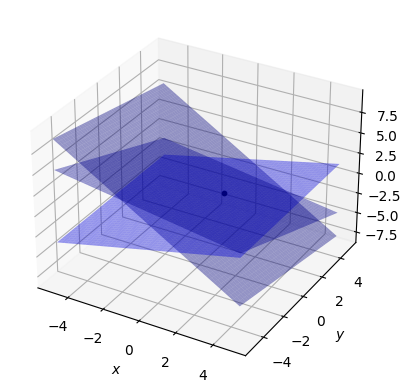

In [16]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                               point_intersection.params[i][0] * X - \
                               point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], color="blue", alpha=0.4)

# ---- Plot le point ---- #
# Le ligne 20 est SEULEMENT POUR DÉMONSTRATION, MAIS PAS DANS LA PARTIE D'ILLUSTRATION !
point_commun = sp.solve((point_intersection.eqs[0], point_intersection.eqs[1], point_intersection.eqs[2]), (x, y, z))
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=10)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./b1.pdf")
plt.show()

Étape 2 : Droite représenté par 2 équations

In [17]:
## ---Seulement pour plot et illustration--- ## 
sp.solve((droite_reference.eqs[0], droite_reference.eqs[1]), (x, y, z))

{x: 8/15 - 2*z/3, y: -5*z/3 - 1/15}

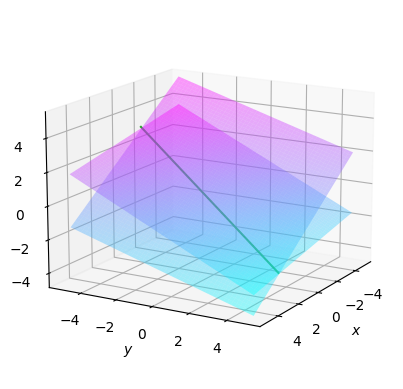

In [18]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

droite_reference_Z = [0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(2):
    droite_reference_Z[i] =   (droite_reference.params[i][3] - \
                               droite_reference.params[i][0] * X - \
                               droite_reference.params[i][1] * Y) / droite_reference.params[i][2]

    ax.plot_surface(X, Y, droite_reference_Z[i], cmap="cool", alpha=0.4)

### --- Plot le ligne --- ###`
# Le ligne 20 est SEULEMENT POUR ILLUSTRATION, MAIS PAS DANS LA PARTIE D'DÉMONSTRATION !
ligne_commun = sp.solve((droite_reference.eqs[0], droite_reference.eqs[1]), (x, y, z))
z_val = np.linspace(-3, 3, 100)
##########################
x_val = 8/15 - 2*z_val/3 # Change ici si vous changez la droite
y_val = -5*z_val/3 - 1/15 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

ax.view_init(azim=30, elev=15)
plt.savefig("./b2.pdf")
plt.show()

Étape 3a : Illustration du théorème d'hyperplan, pour le droite

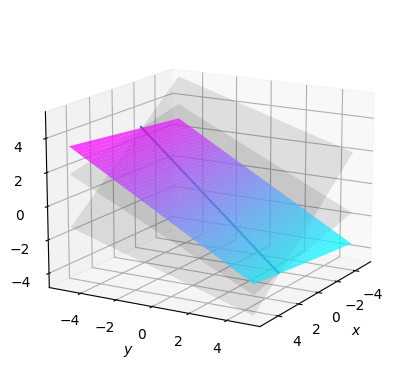

In [19]:
# Planes
n_lamda, n_mu,  = np.random.uniform(-3, 3, 2) # Vous pouvez changer les valeurs ici.
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

droite_reference_Z = [0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(2):
    droite_reference_Z[i] =   (droite_reference.params[i][3] - \
                               droite_reference.params[i][0] * X - \
                               droite_reference.params[i][1] * Y) / droite_reference.params[i][2]

    ax.plot_surface(X, Y, droite_reference_Z[i], color="black", alpha=0.1)

#### ---Plot le ligne--- ####
z_val = np.linspace(-3, 3, 100)
##########################
x_val = 8/15 - 2*z_val/3 # Change ici si vous changez la droite
y_val = -5*z_val/3 - 1/15 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)

# ---Le résultat d'après le théorème d'hyperplan--- #
plan_nouveau_Z = ((n_lamda * droite_reference.params[0][3] + \
                 n_mu * droite_reference.params[1][3]) - \
                 (n_lamda * droite_reference.params[0][0] + 
                   n_mu * droite_reference.params[1][0]
                   ) * X - \
                 (n_lamda * droite_reference.params[0][1] +
                  n_mu * droite_reference.params[1][1]
                  ) * Y) / \
                 (n_lamda * droite_reference.params[0][2] +
                  n_mu * droite_reference.params[1][2]
                  )

ax.plot_surface(X, Y, plan_nouveau_Z, cmap="cool", alpha=0.8)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

ax.view_init(azim=30, elev=15)
plt.savefig("./b3a.pdf")
plt.show()

Étape 3b : Illustration du lemme

- Lemme : Si on a un plan $mx+ny+pz=q$ , alors on peut représenter son orthogonal comme : $\mathbb{K}.(m,n,p)$

- Ici, les paramètres de l'équation du plan sont choisis au hasard, nous constatons que le vecteur normal au plan est déterminé par ses paramètres $(m, n, p)$.

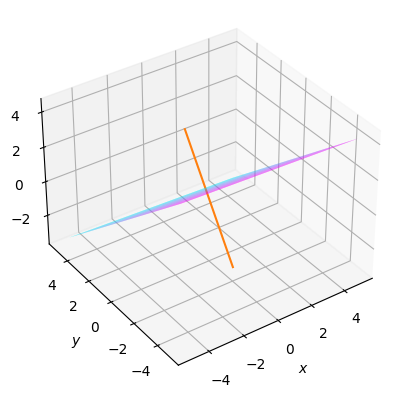

In [20]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

exe_a, exe_b, exe_c, exe_d = np.random.uniform(0, 1, 4)
plan_exe = Plan([exe_a, exe_b, exe_c, exe_d])

#### ---Plot le plan--- ###
plan_exe_Z = (plan_exe.params[0][3] - \
             plan_exe.params[0][0] * X - \
             plan_exe.params[0][1] * Y) / plan_exe.params[0][2]

ax.plot_surface(X, Y, plan_exe_Z, cmap="cool", alpha=0.7)


#### ---Plot le ligne--- ####
t = np.linspace(-3, 3, 100)
##########################
x_val = plan_exe.params[0][0] * t 
y_val = plan_exe.params[0][1] * t 
z_val = plan_exe.params[0][2] * t 

##########################

plt.plot(x_val, y_val, z_val)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

ax.view_init(azim=235, elev=35)
plt.savefig("./b3b.pdf")
plt.show()

Étape 4 : En utilisant le lemme, nous construisons ici les droites perpendiculaires à deux plans différents.

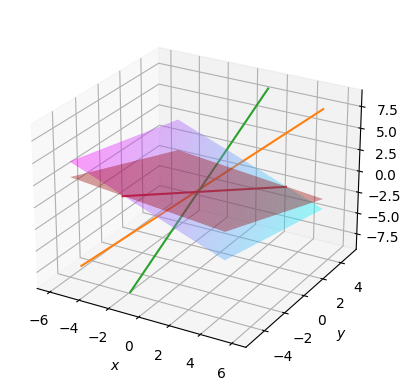

In [21]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

droite_reference_Z = [0, 0]

### ---Plot les plans et les lignes perpendiculaires---- ###
# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(1):
    droite_reference_Z[i] =   (droite_reference.params[i][3] - \
                               droite_reference.params[i][0] * X - \
                               droite_reference.params[i][1] * Y) / droite_reference.params[i][2]

    t = np.linspace(-3, 3, 100)
    x_val = t * droite_reference.params[i][0]
    y_val = t * droite_reference.params[i][1]
    z_val = t * droite_reference.params[i][2]

    ax.plot_surface(X, Y, droite_reference_Z[i], cmap="cool", alpha=0.4)
    ax.plot(x_val, y_val, z_val)

for i in range(1, 2):
    droite_reference_Z[i] =   (droite_reference.params[i][3] - \
                               droite_reference.params[i][0] * X - \
                               droite_reference.params[i][1] * Y) / droite_reference.params[i][2]

    t = np.linspace(-0.5, 0.5, 100)
    x_val = t * droite_reference.params[i][0]
    y_val = t * droite_reference.params[i][1]
    z_val = t * droite_reference.params[i][2]

    ax.plot_surface(X, Y, droite_reference_Z[i], color="red", alpha=0.4)
    ax.plot(x_val, y_val, z_val)
    
### Plot le ligne commun--- ###
# Le ligne 20 est SEULEMENT POUR ILLUSTRATION, MAIS PAS DANS LA PARTIE D'DÉMONSTRATION !
ligne_commun = sp.solve((droite_reference.eqs[0], droite_reference.eqs[1]), (x, y, z))
z_val = np.linspace(-3, 3, 100)
##########################
x_val = 8/15 - 2*z_val/3 # Change ici si vous changez la droite
y_val = -5*z_val/3 - 1/15 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)


ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

ax.view_init(elev=25)
plt.savefig("./b4.pdf")
plt.show()

Étape 5: En utlisant le théorème du faisceau d'hyperplan et notre démonstration, on trouve une combinaison linéaire, les 3 paramètres qui suffisent à la fois :

- contient ces 2 lignes à la fois dans un même plan
- une combinaison linéaire des 3 plans du point donné.

Comme $\gamma$ peut être choisit aléatoirement, on prend $\gamma=1$.

In [45]:
def perpendiculaire_partie(point=Point(), droite=Droite()):
    parametre_matrice = sp.solve([(lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0])*droite.params[0][0]+ 
                                   (lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1])*droite.params[0][1]+
                                   (lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2])*droite.params[0][2],
                                   (lamda*point.params[0][0] + mu*point.params[1][0] + gamma*point.params[2][0])*droite.params[1][0]+ 
                                   (lamda*point.params[0][1] + mu*point.params[1][1] + gamma*point.params[2][1])*droite.params[1][1]+
                                   (lamda*point.params[0][2] + mu*point.params[1][2] + gamma*point.params[2][2])*droite.params[1][2]
                                  ], [lamda, mu, gamma]) 
     
    return list(parametre_matrice.values())

n_lamda, n_mu = perpendiculaire_partie(point_intersection, droite_reference)
display(n_lamda), display(n_mu)

3*gamma/4

-23*gamma/72

(None, None)

In [46]:
n_gamma = 1

n_lamda = n_lamda.subs({gamma: n_gamma}); n_mu = n_mu.subs({gamma: n_gamma})
display(n_lamda), display(n_mu), display(n_gamma)

3/4

-23/72

1

(None, None, None)

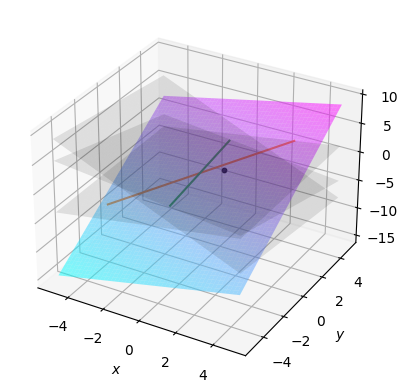

In [47]:
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(3):
    point_intersection_Z[i] = (point_intersection.params[i][3] - \
                               point_intersection.params[i][0] * X - \
                               point_intersection.params[i][1] * Y) / point_intersection.params[i][2]

    ax.plot_surface(X, Y, point_intersection_Z[i], color="black", alpha=0.1)
    
# ---Le résultat d'après le théorème d'hyperplan--- #
plan_nouveau_Z = ((n_lamda * point_intersection.params[0][3] + \
                 n_mu * point_intersection.params[1][3] + \
                 n_gamma * point_intersection.params[2][3]) - \
                 (n_lamda * point_intersection.params[0][0] + 
                   n_mu * point_intersection.params[1][0] + 
                   n_gamma * point_intersection.params[2][0]) * X - \
                 (n_lamda * point_intersection.params[0][1] +
                  n_mu * point_intersection.params[1][1] +
                  n_gamma * point_intersection.params[2][1]) * Y) / \
                 (n_lamda * point_intersection.params[0][2] +
                  n_mu * point_intersection.params[1][2] +
                  n_gamma * point_intersection.params[2][2])
plan_nouveau_Z=np.array(plan_nouveau_Z, dtype=np.float32)               
ax.plot_surface(X, Y, plan_nouveau_Z, cmap="cool", alpha=0.5)

for i in range(1):
    droite_reference_Z[i] =   (droite_reference.params[i][3] - \
                               droite_reference.params[i][0] * X - \
                               droite_reference.params[i][1] * Y) / droite_reference.params[i][2]

    t = np.linspace(-2, 2, 100)
    x_val = t * droite_reference.params[i][0]
    y_val = t * droite_reference.params[i][1]
    z_val = t * droite_reference.params[i][2]

    ax.plot(x_val, y_val, z_val)
    
for i in range(1, 2):
    droite_reference_Z[i] =   (droite_reference.params[i][3] - \
                               droite_reference.params[i][0] * X - \
                               droite_reference.params[i][1] * Y) / droite_reference.params[i][2]

    t = np.linspace(-0.2, 0.2, 100)
    x_val = t * droite_reference.params[i][0]
    y_val = t * droite_reference.params[i][1]
    z_val = t * droite_reference.params[i][2]

    ax.plot(x_val, y_val, z_val)
    
ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=10)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./b5.pdf")
plt.show()

Étape 6 : Vérification, le résultat est parfait !

- On fait une rotation sur le caméra pour mieux présenter le résultat.

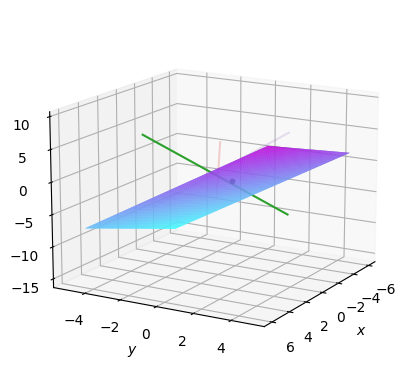

In [25]:
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

point_intersection_Z = [0, 0, 0]

    
# ---Le résultat d'après le théorème d'hyperplan--- #
plan_nouveau_Z = ((n_lamda * point_intersection.params[0][3] + \
                 n_mu * point_intersection.params[1][3] + \
                 n_gamma * point_intersection.params[2][3]) - \
                 (n_lamda * point_intersection.params[0][0] + 
                   n_mu * point_intersection.params[1][0] + 
                   n_gamma * point_intersection.params[2][0]) * X - \
                 (n_lamda * point_intersection.params[0][1] +
                  n_mu * point_intersection.params[1][1] +
                  n_gamma * point_intersection.params[2][1]) * Y) / \
                 (n_lamda * point_intersection.params[0][2] +
                  n_mu * point_intersection.params[1][2] +
                  n_gamma * point_intersection.params[2][2])
plan_nouveau_Z=np.array(plan_nouveau_Z, dtype=np.float32)                
ax.plot_surface(X, Y, plan_nouveau_Z, cmap="Blues", alpha=0.8)

### ---Plot le plan--- ###
plan_perp_Z = (plan_perp.params[0][3] - \
               plan_perp.params[0][0] * X - 
               plan_perp.params[0][1] * Y)/plan_perp.params[0][2]
plan_perp_Z=np.array(plan_perp_Z, dtype=np.float32)   
ax.plot_surface(X, Y, plan_perp_Z, cmap="cool", alpha=0.8)

ax.scatter(point_commun[x], point_commun[y], point_commun[z], color="black", s=10)

# Le ligne 20 est SEULEMENT POUR ILLUSTRATION, MAIS PAS DANS LA PARTIE D'DÉMONSTRATION !
ligne_commun = sp.solve((droite_reference.eqs[0], droite_reference.eqs[1]), (x, y, z))
z_val = np.linspace(-3, 3, 100)
##########################
x_val = 8/15 - 2*z_val/3 # Change ici si vous changez la droite
y_val = -5*z_val/3 - 1/15 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)

# ---Explication : Ici, on utilise le nom "point_intersection" comme celui dans l'exemple précédent--- #
for i in range(1):
    droite_reference_Z[i] =   (droite_reference.params[i][3] - \
                               droite_reference.params[i][0] * X - \
                               droite_reference.params[i][1] * Y) / droite_reference.params[i][2]

    t = np.linspace(-3, 3, 100)
    x_val = t * droite_reference.params[i][0]
    y_val = t * droite_reference.params[i][1]
    z_val = t * droite_reference.params[i][2]
    
    ax.plot(x_val, y_val, z_val, alpha=0.2)

for i in range(1, 2):
    droite_reference_Z[i] =   (droite_reference.params[i][3] - \
                               droite_reference.params[i][0] * X - \
                               droite_reference.params[i][1] * Y) / droite_reference.params[i][2]

    t = np.linspace(-0.5, 0.5, 100)
    x_val = t * droite_reference.params[i][0]
    y_val = t * droite_reference.params[i][1]
    z_val = t * droite_reference.params[i][2]

    ax.plot(x_val, y_val, z_val, alpha=0.2)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

ax.view_init(azim=30, elev=15)
plt.savefig("./b6.pdf")
plt.show()

## Question 2

- La ligne perpendiculaire commune aux deux droites se trouve dans les plans perpendiculaires aux droites respectives. Ces plans déterminent les deux équations nécessaires à la construction de la droite. Nous allons donc construire ces deux plans perpendiculaires et chercher l'intersection de ces deux plans.

In [26]:
def perpendiculaire_commune(droite1=Droite(),droite2=Droite()):
    m = None
    m = sp.Symbol("m")
    point_sur_droite = Point_de_droite(m ,droite1)
    point_de_nouveau = Point(droite2.params[0],droite2.params[1], tuple(perpendiculaire(point_sur_droite, droite1).params[0]))
    point_de_retour  =  Point(droite1.params[0],droite1.params[1], tuple(perpendiculaire(point_de_nouveau,droite2).params[0]))
    
    Le_constante = sp.solve([sp.Matrix([point_sur_droite.params[0],
                                        point_sur_droite.params[1],
                                        point_sur_droite.params[2],
                                        point_de_retour.params[2]]).det()],[m])
    
    Le_point_1 = Point_de_droite(Le_constante[m],droite1)
    Le_plan_1  = Plan(tuple(perpendiculaire(Le_point_1,droite1).params[0]))
    Le_point_2 = Point(droite2.params[0],droite2.params[1],Le_plan_1.params[0])
    Le_plan_2  = Plan(tuple(perpendiculaire(Le_point_2,droite2).params[0]))
    
    Droite_finale = Droite(Le_plan_1.params[0],Le_plan_2.params[0])
    
    return  Droite_finale

droite1=Droite((2, 1, 3, 1), (3, 9, 17, 1))
droite2=Droite((1,5,8,3),(9,11,3,6))
perpendiculaire_commune(droite1,droite2).info()

Les équations de ce droite :


2*x/19 + 5*y/19 - 3*z/19 - 39609/2132731

-21973*x/213674 + 20769*y/213674 - 5117*z/106837 + 1572681957/23984692826

Étape 0 : Deux lignes

- Pour illustration et mieux dessiner, c'est obligatoire de trouver les expressions de $x$ et $y$. Cependant, cette partie n'est jamais utilisé dans les calculs et fonctions au-dessus !!!

In [27]:
## ---Seulement pour plot et illustration--- ## 
sp.solve((droite1.eqs[0], droite1.eqs[1]), (x, y, z))

{x: 8/15 - 2*z/3, y: -5*z/3 - 1/15}

In [28]:
## ---Seulement pour plot et illustration--- ## 
sp.solve((droite2.eqs[0], droite2.eqs[1]), (x, y, z))

{x: 73*z/34 - 3/34, y: 21/34 - 69*z/34}

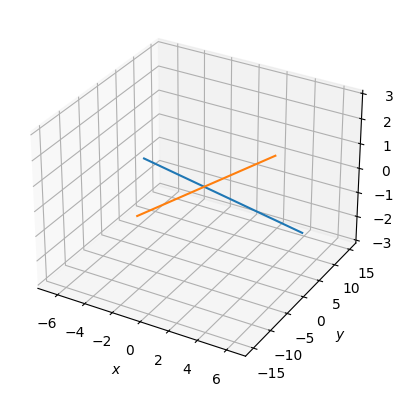

In [29]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

droite1_Z = [0, 0]


z_val = np.linspace(-3, 3, 100)
##########################
x_val = 15/8 - 2*z_val/3 # Change ici si vous changez la droite
y_val = -1/15 - 5*z_val/1 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)
droite2_Z = [0, 0]


z_val = np.linspace(-3, 3, 100)
##########################
x_val = - 3/34 + 73*z_val/34  # Change ici si vous changez la droite
y_val = -69*z_val/34 + 21/34 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)



ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

plt.savefig("./c1.pdf")
plt.show()

Étape 1 : On choisit un point, faire une perpendiculiaire

- Nous avons choisi aléatoirement un point sur la première droite et construit un plan perpendiculaire à cette droite passant par ce point.

- Dans cette partie, on prend $m=-1$ pour mieux présenter.

In [30]:
def perpendiculaire_commune_partie1(droite1=Droite(),droite2=Droite()):
    m = None
    m = sp.Symbol("m")
    point_sur_droite = Point_de_droite(m ,droite1)
    point_de_nouveau = Point(droite2.params[0],droite2.params[1], tuple(perpendiculaire(point_sur_droite, droite1).params[0]))
    point_de_retour  =  Point(droite1.params[0],droite1.params[1], tuple(perpendiculaire(point_de_nouveau,droite2).params[0]))

    Le_constante = sp.solve([sp.Matrix([point_sur_droite.params[0],
                                        point_sur_droite.params[1],
                                        point_sur_droite.params[2],
                                        point_de_retour.params[2]]).det()],[m])
    
    Le_point_1 = Point_de_droite(Le_constante[m],droite1)
    return Plan(tuple(perpendiculaire(Le_point_1,droite1).params[0]))


droite1=Droite((2, 1, 3, 1), (3, 9, 17, 1))
droite2=Droite((1,5,8,3),(9,11,3,6))
plan_perp1 = perpendiculaire_commune_partie1(droite1,droite2)
plan_perp1.info()

L'équation de ce plan :


2*x/19 + 5*y/19 - 3*z/19 - 39609/2132731

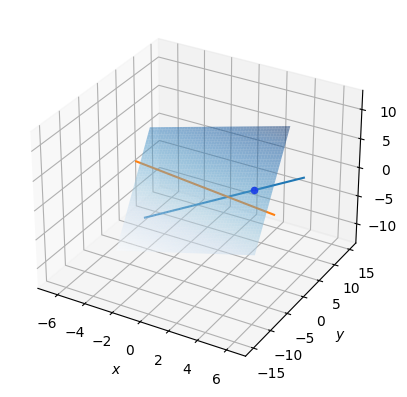

In [31]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)


### ---Ligne 1--- ####
droite1_Z = [0, 0]

z_val = np.linspace(-3, 3, 100)
##########################
x_val = 15/8 - 2*z_val/3 # Change ici si vous changez la droite
y_val = -1/15 - 5*z_val/1 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)

### ---Ligne 2--- ###
droite2_Z = [0, 0]

z_val = np.linspace(-3, 3, 100)
##########################
x_val = - 3/34 + 73*z_val/34  # Change ici si vous changez la droite
y_val = -69*z_val/34 + 21/34 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)

### --- Le point --- ###
m = -1
x_valm = 15/8 - 2*m/3
y_valm = -5*m - 1/15
ax.scatter(x_valm, y_valm, m, s=20, color="b")

### --- Le plan --- ####

plan_perp1_Z = (plan_perp1.params[0][3] - \
                plan_perp1.params[0][0] * X - \
                plan_perp1.params[0][1] * Y) / plan_perp1.params[0][2]


plan_perp1_Z=np.array(plan_perp1_Z, dtype=np.float32) 
ax.plot_surface(X, Y, plan_perp1_Z, cmap="Blues", alpha=0.5)
    
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

plt.savefig("./c2.pdf")
plt.show()
##########################

Étape 2 :

- Nous cherchons le point d'intersection entre la deuxième droite et le plan que nous avons construit. Ce point satisfait les deux équations de la droite ainsi que l'équation du plan construit.


- Note : Étant donné que les échelles des axes ont changé, le droite de l'image d'origine ont également été modifiées, mais en réalité, il s'agit de la même droite.

In [32]:
def perpendiculaire_commune_partie2(droite1=Droite(),droite2=Droite()):
    m = None
    m = sp.Symbol("m")
    point_sur_droite = Point_de_droite(m ,droite1)
    point_de_nouveau = Point(droite2.params[0],droite2.params[1], tuple(perpendiculaire(point_sur_droite, droite1).params[0]))
    point_de_retour  =  Point(droite1.params[0],droite1.params[1], tuple(perpendiculaire(point_de_nouveau,droite2).params[0]))
    
    Le_constante = sp.solve([sp.Matrix([point_sur_droite.params[0],
                                        point_sur_droite.params[1],
                                        point_sur_droite.params[2],
                                        point_de_retour.params[2]]).det()],[m])
    
    Le_point_1 = Point_de_droite(Le_constante[m],droite1)
    Le_plan_1  = Plan(tuple(perpendiculaire(Le_point_1,droite1).params[0]))
    Le_point_2 = Point(droite2.params[0],droite2.params[1],Le_plan_1.params[0])
    return Le_point_2
    

droite1=Droite((2, 1, 3, 1), (3, 9, 17, 1))
droite2=Droite((1,5,8,3),(9,11,3,6))
point_inter_2 = perpendiculaire_commune_partie2(droite1,droite2)
point_inter_2.info()

Les équations de ce point :


x + 5*y + 8*z - 3

9*x + 11*y + 3*z - 6

2*x/19 + 5*y/19 - 3*z/19 - 39609/2132731

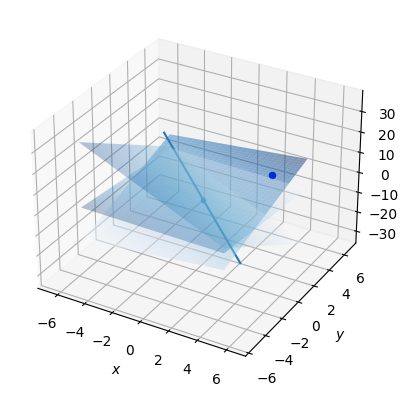

In [33]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

droite1_Z = [0, 0]

z_val = np.linspace(-3, 3, 100)
##########################
x_val = 15/8 - 2*z_val/3 # Change ici si vous changez la droite
y_val = -1/15 - 5*z_val/1 # Change ici si vous changez la droite
##########################

# plt.plot(x_val, y_val, z_val)
droite2_Z = [0, 0]

z_val = np.linspace(-3, 3, 100)
##########################
x_val = - 3/34 + 73*z_val/34  # Change ici si vous changez la droite
y_val = -69*z_val/34 + 21/34 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)

m = -1
x_valm = 15/8 - 2*m/3
y_valm = -5*m - 1/15
ax.scatter(x_valm, y_valm, m, s=20, color="b")


plan_perp1_Z = (plan_perp1.params[0][3] - \
                plan_perp1.params[0][0] * X - \
                plan_perp1.params[0][1] * Y) / plan_perp1.params[0][2]
plan_perp1_Z=np.array(plan_perp1_Z, dtype=np.float32)
ax.plot_surface(X, Y, plan_perp1_Z, cmap="Blues", alpha=0.5)
    
droite2_plan_Z = [0, 0]
for i in range(2):
    droite2_plan_Z[i] = (droite2.params[i][3] - \
                               droite2.params[i][0] * X - \
                               droite2.params[i][1] * Y) / droite2.params[i][2]

    ax.plot_surface(X, Y, droite2_plan_Z[i], cmap="Blues", alpha=0.3)
    
point_inter_2_val = sp.solve((point_inter_2.eqs[0], point_inter_2.eqs[1], point_inter_2.eqs[2]), (x, y, z))
ax.scatter(point_inter_2_val[x], point_inter_2_val[y], point_inter_2_val[z], alpha=0.8, s=10)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

plt.savefig("./c3.pdf")
plt.show()
##########################

Étape 3 : 
- Ensuite, nous avons construit un plan perpendiculaire à la deuxième droite passant par ce point.

In [34]:
def perpendiculaire_commune_partie3(droite1=Droite(),droite2=Droite()):
    m = None
    m = sp.Symbol("m")
    point_sur_droite = Point_de_droite(m ,droite1)
    point_de_nouveau = Point(droite2.params[0],droite2.params[1], tuple(perpendiculaire(point_sur_droite, droite1).params[0]))
    point_de_retour  =  Point(droite1.params[0],droite1.params[1], tuple(perpendiculaire(point_de_nouveau,droite2).params[0]))
    
    Le_constante = sp.solve([sp.Matrix([point_sur_droite.params[0],
                                        point_sur_droite.params[1],
                                        point_sur_droite.params[2],
                                        point_de_retour.params[2]]).det()],[m])
    
    Le_point_1 = Point_de_droite(Le_constante[m],droite1)
    Le_plan_1  = Plan(tuple(perpendiculaire(Le_point_1,droite1).params[0]))
    Le_point_2 = Point(droite2.params[0],droite2.params[1],Le_plan_1.params[0])
    Le_plan_2  = Plan(tuple(perpendiculaire(Le_point_2,droite2).params[0]))
    
    return Le_plan_2

droite1=Droite((2, 1, 3, 1), (3, 9, 17, 1))
droite2=Droite((1,5,8,3),(9,11,3,6))
plan_perp2 = perpendiculaire_commune_partie3(droite1,droite2)
plan_perp2.info()

L'équation de ce plan :


-21973*x/213674 + 20769*y/213674 - 5117*z/106837 + 1572681957/23984692826

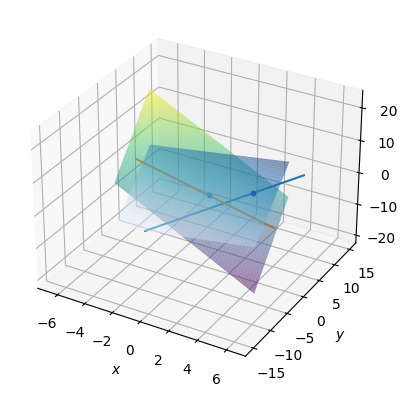

In [35]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

droite1_Z = [0, 0]

z_val = np.linspace(-3, 3, 100)
##########################
x_val = 15/8 - 2*z_val/3 # Change ici si vous changez la droite
y_val = -1/15 - 5*z_val/1 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)
droite2_Z = [0, 0]

z_val = np.linspace(-3, 3, 100)
##########################
x_val = - 3/34 + 73*z_val/34  # Change ici si vous changez la droite
y_val = -69*z_val/34 + 21/34 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)

m = -1
x_valm = 15/8 - 2*m/3
y_valm = -5*m - 1/15
ax.scatter(x_valm, y_valm, m, s=10, color="b")


plan_perp1_Z = (plan_perp1.params[0][3] - \
                plan_perp1.params[0][0] * X - \
                plan_perp1.params[0][1] * Y) / plan_perp1.params[0][2]
plan_perp1_Z=np.array(plan_perp1_Z, dtype=np.float32)
ax.plot_surface(X, Y, plan_perp1_Z, cmap="Blues", alpha=0.5)
    
# droite2_plan_Z = [0, 0]
# for i in range(2):
#     droite2_plan_Z[i] = (droite2.params[i][3] - \
#                                droite2.params[i][0] * X - \
#                                droite2.params[i][1] * Y) / droite2.params[i][2]

#     ax.plot_surface(X, Y, droite2_plan_Z[i], cmap="Blues", alpha=0.3)
    
point_inter_2_val = sp.solve((point_inter_2.eqs[0], point_inter_2.eqs[1], point_inter_2.eqs[2]), (x, y, z))
ax.scatter(point_inter_2_val[x], point_inter_2_val[y], point_inter_2_val[z], alpha=0.8, s=10)

plan_perp2_Z = (plan_perp2.params[0][3] - \
                plan_perp2.params[0][0] * X - \
                plan_perp2.params[0][1] * Y) / plan_perp2.params[0][2]

ax.plot_surface(X, Y, plan_perp2_Z, cmap="viridis", alpha=0.5)
ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

plt.savefig("./c4.pdf")
plt.show()
##########################

Étape 4 : Intersection et Vérification !!!!

La ligne perpendiculaire commune que nous cherchons est l'intersection de ces deux plans. L'équation de la droite est déterminée par ces deux plans, ce qui est le résultat que nous recherchons !

In [37]:
ligne_commun = sp.solve((perp_commune.eqs[0], perp_commune.eqs[1]), (x, y, z))
ligne_commun[x], ligne_commun[y]


(37*z/503 + 28857306/56461247, 287*z/503 - 7558257/56461247)

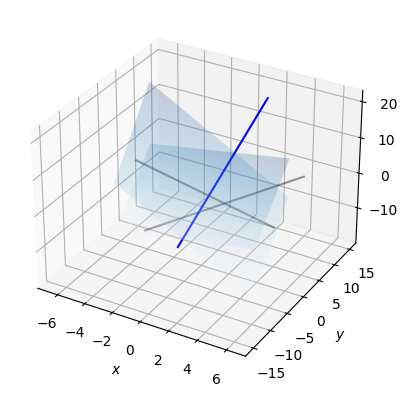

In [59]:
# Planes
ax = plt.axes(projection="3d")

x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

droite1_Z = [0, 0]


# Le ligne 20 est SEULEMENT POUR ILLUSTRATION, MAIS PAS DANS LA PARTIE D'DÉMONSTRATION !
z_val = np.linspace(-3, 3, 100)
##########################
x_val = 15/8 - 2*z_val/3 # Change ici si vous changez la droite
y_val = -1/15 - 5*z_val/1 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val,color="black", alpha=0.4)
droite2_Z = [0, 0]


# Le ligne 20 est SEULEMENT POUR ILLUSTRATION, MAIS PAS DANS LA PARTIE D'DÉMONSTRATION !
z_val = np.linspace(-3, 3, 100)
##########################
x_val = - 3/34 + 73*z_val/34  # Change ici si vous changez la droite
y_val = -69*z_val/34 + 21/34 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val,color="black", alpha=0.4)

ax.plot_surface(X, Y, plan_perp1_Z, cmap="Blues", alpha=0.2)

ax.plot_surface(X, Y, plan_perp2_Z, cmap="Blues", alpha=0.2)
####
z_vval = np.linspace(-10, 20, 1000)
x_vval = 37*z_vval/503 + 28857306/56461247
y_vval =  287*z_vval/503 - 7558257/56461247
plt.plot(x_vval, y_vval, z_vval, color="b")
###


ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

plt.savefig("./c5.pdf")
plt.show()


## Question 4(a)
- Notations:
  - Le point 1 donné par : $$\begin{cases}a_1x+b_1y+c_1z=d_1 \quad(\mathscr{H}_1)\\a_2x+b_2y+c_2z=d_2\quad(\mathscr{H}_2)\\a_3x+b_3y+c_3y=d_3\quad(\mathscr{H}_3)\end{cases}$$
  - Le point 2 donné par : $$\begin{cases}a_1'x+b_1'y+c_1'z=e_1 \\a_2'x+b_2'y+c_2'z=e_2\\a_3'x+b_3'y+c_3'y=e_3\end{cases}$$
- En utilisant l'opération a, on peut obtenir 3 plans passant par le point 2 et parallèles respectivement aux 3 plans passant par le point 1. Maintenant les plans passant par le point 2 peuvent être écrits comme :  $$\begin{cases}a_1x+b_1y+c_1z=d_1' \quad(\mathscr{H}_1)'\\a_2x+b_2y+c_2z=d_2'\quad(\mathscr{H}_2)'\\a_3x+b_3y+c_3y=d_3'\quad(\mathscr{H}_3)'\end{cases}$$
- D'après le **Faisceau d'hyperplan**, si on calcule la combinaison linéaire de ces 3 plans , on obtient toujours un plan passant par ce point. Donc pour chaque point (3 équations respectivement), on calcule la combinaison linéaire avec les même coefficients. Donc on obtient deux plans parallèles: $$\begin{cases}ax+by+cz=d \\ax+by+cz=d'\end{cases}$$
- Évidemment on veut $d=d'$ parce que le plan qu'on veut est le plan qui passe par le point 1 et à la fois le point 2. Comme les deux équations sont des combinaisons linéaires de 3 équations originales. Donc: $$\begin{cases}\lambda d_1+\mu d_2+\gamma d_3 =d \\\lambda d_1'+\mu d_2'+\gamma d_3' =d'\end{cases}$$ Et avec cette équation on peut calculer les coeffients de la combinaison linéaire, ensuite on obtient le plan passant par les deux points. Comme il y a de nombreuses solutions de cette équation, on choisit simplement 2 premières.

In [80]:
point1= Point((2, 5, 3, 1), (1, 0, 3, -1),(2, 1, -2, 0))
point2= Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))

plan_reference1 = Plan(point1.params[0])  
plan_reference2 = Plan(point1.params[1]) 
plan_reference3 = Plan(point1.params[2]) # 3 plans passant par le point 1 

a = parallel(point2, plan_reference1).params[0]
b = parallel(point2, plan_reference2).params[0]
c = parallel(point2, plan_reference3).params[0]  # 3 plans passant par le point 2 et parallèls à 3 plans au-desso

point_func = sp.Matrix([[point1.params[0][0], point1.params[0][1], point1.params[0][2], point1.params[0][3]], # a1, b1, c1, -d1
                        [point1.params[1][0], point1.params[1][1], point1.params[1][2], point1.params[1][3]], # a2, b2, c2, -d2
                        [point1.params[2][0], point1.params[2][1], point1.params[2][2], point1.params[2][3]]]) # a3, b3, c3, -d3


noyau=sp.Matrix([a[3]-point1.params[0][3],b[3]-point1.params[1][3],c[3]-point1.params[2][3]]).transpose().nullspace()

# noyau de [[d1-d1'],[d2-d2'],[d3-d3']]
Result1 = noyau[0].transpose() *point_func
Result2 =noyau[1].transpose() *point_func

ligne_final4a = Droite(Result1, Result2)
ligne_final4a.info()

Les équations de ce droite :


77*x/69 + 20*y/69 + 73*z/23 + 65/69

8*x/69 - 256*y/69 - 111*z/23 + 65/69

Vérification :

In [81]:
## ---Seulement pour plot et illustration--- ## 
sp.solve((ligne_final4a.eqs[0], ligne_final4a.eqs[1]), (x, y, z))

{x: -179*z/72 - 65/72, y: 65/288 - 397*z/288}

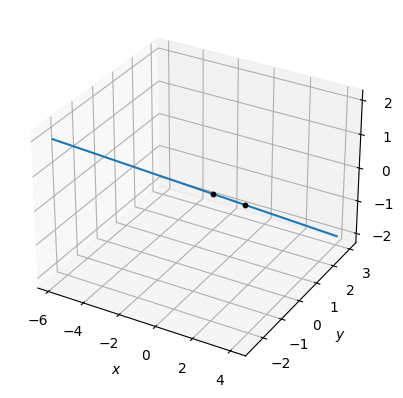

In [82]:
### --- Prerequistes --- ###
ax = plt.axes(projection="3d")
ax.grid(linewidth=0.5, linestyle='-', alpha=0.1)
x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

### --- Résoudre le point --- ###
point1_XYZ = sp.solve((point1.eqs[0], point1.eqs[1], point1.eqs[2]), (x, y, z))
point2_XYZ = sp.solve((point2.eqs[0], point2.eqs[1], point2.eqs[2]), (x, y, z))

ax.scatter(point1_XYZ[x], point1_XYZ[y], point1_XYZ[z], color="black", s=10)
ax.scatter(point2_XYZ[x], point2_XYZ[y], point2_XYZ[z], color="black", s=10)

### --- Résoudre le ligne --- ###
z_val = np.linspace(-2, 2, 100)
##########################
x_val = -65/72 - 179*z_val/72 # Change ici si vous changez la droite
y_val = -397*z_val/288 + 65/288 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./4a1.pdf")
plt.show()

## Question 4(b)
Dans cette partie, on va construire une droite (2 équations) passant par un point (3 équations) et perpendiculaire à un plan donné (1 équation) en utilisant l'opération b.
- Notations:
    - Le plan donné : $$mx+ny+pz=q \quad(\mathscr{P})$$
    - Le point donné par : $$\begin{cases}a_1x+b_1y+c_1z=d_1 \quad(\mathscr{H}_1)\\a_2x+b_2y+c_2z=d_2\quad(\mathscr{H}_2)\\a_3x+b_3y+c_3y=d_3\quad(\mathscr{H}_3)\end{cases}$$
- On note la droite qu'on veut $\mathscr{l}$
- On fait intersecter le plan $\mathscr{P}$ et le plan $\mathscr{H}_1$, le plan $\mathscr{P}$ et le plan $\mathscr{H}_2$. Donc on obtient deux droites non parallèles sur le plan $\mathscr{P}$ connu , notés respectivement $A_1$ et $A_2$.

- Ensuite, en utilisant **l'opération b**, on calcule les deux plans qui sont respectivement perpendiculaires aux droites $A_1$ et $A_2$ et passent le point donné , notés respectivement $\mathscr{H}_a$ et $\mathscr{H}_b$. \
Comme on a $A_1 \perp \mathscr{H}_a$, $A_1$ est bien perpendiculaire à tous les droites sur le plan $\mathscr{H}_a$ et $\mathscr{l} \in \mathscr{H}_a$, donc on obtient que $A_1 \perp \mathscr{l}$. \
De même on obtient que $A_2 \perp \mathscr{l}$. Cela veut dire que $\mathscr{l}$ est perpendiculaire à deux doites non parallèles sur le plan $\mathscr{P}$.
- Finalement, on vérifie que $\mathscr{l} \perp \mathscr{P}$.

In [86]:
point_intersection = Point((1, 2, 3, 1), (4, 1, 3, 2), (1, 0, -2, 2))
plan_donne = Plan((3, 9, 17, 1))
droite_reference1 = Droite(point_intersection.params[0], plan_donne.params[0]) 
droite_reference2 = Droite(point_intersection.params[1], plan_donne.params[0])
c=perpendiculaire(point_intersection, droite_reference1)
d=perpendiculaire(point_intersection, droite_reference2)

droite4b = Droite(c.params[0], d.params[0])
droite4b.info()

Les équations de ce droite :


-119*x/72 + 17*y/9 - 17*z/24 - 101/72

85*x/396 + 1003*y/792 - 17*z/24 - 401/198

Vérification :

In [89]:
## ---Seulement pour plot et illustration--- ## 
sp.solve((droite4b.eqs[0], droite4b.eqs[1]), (x, y, z))

{x: 3*z/17 + 237/289, y: 9*z/17 + 422/289}

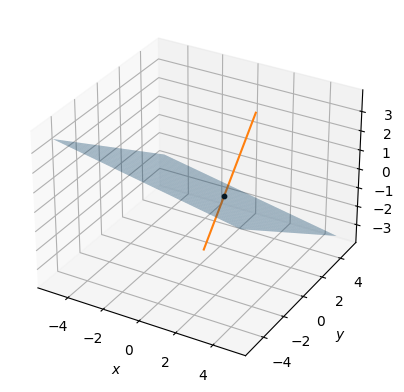

In [91]:
### --- Prerequistes --- ###
ax = plt.axes(projection="3d")
ax.grid(linewidth=0.5, linestyle='-', alpha=0.1)
x_data = np.arange(-5, 5, 0.01)
y_data = np.arange(-5, 5, 0.01)

X, Y = np.meshgrid(x_data, y_data)

### --- Résoudre le point --- ###
point1_XYZ = sp.solve((point_intersection.eqs[0], point_intersection.eqs[1], point_intersection.eqs[2]), (x, y, z))

ax.scatter(point1_XYZ[x], point1_XYZ[y], point1_XYZ[z], color="black", s=10)

### --- Plot le plan --- ###
plan_donne_Z = (plan_donne.params[0][3] - \
                plan_donne.params[0][0] * X - \
                plan_donne.params[0][1] * Y) / plan_donne.params[0][2]

ax.plot_surface(X, Y, plan_donne_Z, alpha=0.4)
### --- Résoudre le ligne --- ###
z_val = np.linspace(-3, 3, 100)
##########################
x_val = 237/289 + 3*z_val/17 # Change ici si vous changez la droite
y_val = 9*z_val/17 + 422/289 # Change ici si vous changez la droite
##########################

plt.plot(x_val, y_val, z_val)

ax.set_xlabel("$x$")
ax.set_ylabel("$y$")
ax.set_zlabel("$z$")

# ax.view_init(azim=30, elev=15)
plt.savefig("./4a1.pdf")
plt.show()

## Résumé

- Le théorème Faisceau d'Hyperplan est une très utile. Il nous permet d'étendre de manière plus flexible n'importe quel objet (point, ligne ou surface) dans l'espace soumis à plusieurs équations de contrainte.

- Ce concept inclut des objets soumis à plusieurs équations de contrainte, tels que des lignes contenant des points, des surfaces contenant des points, des surfaces contenant des lignes, c'est-à-dire des combinaisons linéaires de formes linéaires correspondantes. Dans le premier exemple, la combinaison linéaire de trois équations est nécessaire pour déterminer le plan passant par un point donné. Les coefficients correspondants sont à leur tour soumis à de nouvelles contraintes, telles que la parallélisme avec d'autres plans ou la perpendicularité avec d'autres lignes, ce qui permet de déterminer une solution unique pour ces coefficients et donc un plan réalisable unique.

- La construction de plans parallèles à un point donné et de plans perpendiculaires à une ligne est très utile, car cela facilite la tâche de tracer une perpendiculaire à un point donné. Selon la définition de la perpendiculaire, il est nécessaire de trouver les deux plans correspondants, ce qui peut être fait en utilisant les plans parallèles et perpendiculaires mentionnés précédemment.

- Enfin, nous pouvons utiliser cette théorie et les constructions que nous avons faites de manière flexible. Dans le cas a), nous pouvons déplacer un plan puis résoudre le problème en superposant les deux plans. Dans le cas b), nous pouvons effectuer deux constructions perpendiculaires pour trouver la ligne perpendiculaire recherchée.